CODE BLOCK: 1

In [1]:
import torch
import torch.nn as nn
# import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

CODE BLOCK: 2

In [2]:
# CUDA?
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)

CUDA Available? True


CODE BLOCK: 3

In [3]:
# Train data transformations
train_transforms = transforms.Compose([
    transforms.RandomRotation((-15., 15.), fill=1),
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,)),
    ])

# Test data transformations
test_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
    ])

CODE BLOCK: 4

In [4]:
from utils import get_mnist_data

train_data, test_data = get_mnist_data(train_transforms, test_transforms)

CODE BLOCK: 5

In [5]:
batch_size = 512

kwargs = {'batch_size': batch_size, 'shuffle': True, 'num_workers': 4, 'pin_memory': True}

test_loader = torch.utils.data.DataLoader(test_data, **kwargs)
train_loader = torch.utils.data.DataLoader(train_data, **kwargs)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


CODE BLOCK: 6

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


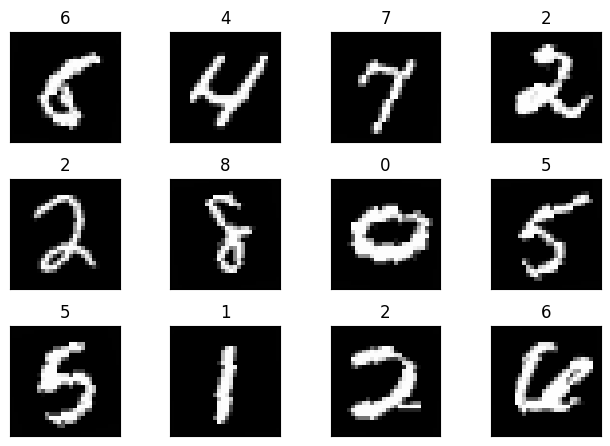

In [11]:
import matplotlib.pyplot as plt

batch_data, batch_label = next(iter(train_loader))

fig = plt.figure()

for i in range(12):
  plt.subplot(3,4,i+1)
  plt.tight_layout()
  plt.imshow(batch_data[i].squeeze(0), cmap='gray')
  plt.title(batch_label[i].item())
  plt.xticks([])
  plt.yticks([])

CODE BLOCK: 7

In [10]:
from model import model_2

CODE BLOCK: 8

In [12]:
# Data to plot accuracy and loss graphs
train_losses = []
test_losses = []
train_acc = []
test_acc = []

test_incorrect_pred = {'images': [], 'ground_truths': [], 'predicted_vals': []}

CODE BLOCK: 9

In [13]:
from utils import train, test
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = model_2().to(device)
summary(model, input_size=(1, 28, 28))

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 26, 26]             144
              ReLU-2           [-1, 16, 26, 26]               0
       BatchNorm2d-3           [-1, 16, 26, 26]              32
           Dropout-4           [-1, 16, 26, 26]               0
            Conv2d-5           [-1, 32, 24, 24]           4,608
              ReLU-6           [-1, 32, 24, 24]               0
       BatchNorm2d-7           [-1, 32, 24, 24]              64
           Dropout-8           [-1, 32, 24, 24]               0
            Conv2d-9           [-1, 10, 24, 24]             320
        MaxPool2d-10           [-1, 10, 12, 12]               0
           Conv2d-11           [-1, 16, 10, 10]           1,440
             ReLU-12           [-1, 16, 10, 10]               0
    

CODE BLOCK: 10

In [14]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if cuda else "cpu")
model = model_2().to(device)


optimizer = optim.SGD(model.parameters(), lr=0.09, momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1, verbose=True)
num_epochs = 15

for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  model, train_losses, train_acc = train(model, device, train_loader, optimizer, train_losses, train_acc)
  model, test_losses, test_acc = test(model, device, test_loader, test_losses, test_acc)
  scheduler.step()

Adjusting learning rate of group 0 to 9.0000e-02.
Epoch 1


Loss=0.21250438690185547 Batch_id=117 Accuracy=86.00: 100%|██████████| 118/118 [00:25<00:00,  4.58it/s]



Test set: Average loss: 0.0682, Accuracy: 9786/10000 (97.86%)

Adjusting learning rate of group 0 to 9.0000e-02.
Epoch 2


Loss=0.11614951491355896 Batch_id=117 Accuracy=97.58: 100%|██████████| 118/118 [00:21<00:00,  5.53it/s]



Test set: Average loss: 0.0451, Accuracy: 9861/10000 (98.61%)

Adjusting learning rate of group 0 to 9.0000e-02.
Epoch 3


Loss=0.03704008460044861 Batch_id=117 Accuracy=98.10: 100%|██████████| 118/118 [00:19<00:00,  5.97it/s]



Test set: Average loss: 0.0370, Accuracy: 9881/10000 (98.81%)

Adjusting learning rate of group 0 to 9.0000e-02.
Epoch 4


Loss=0.04003505781292915 Batch_id=117 Accuracy=98.30: 100%|██████████| 118/118 [00:21<00:00,  5.60it/s]



Test set: Average loss: 0.0286, Accuracy: 9917/10000 (99.17%)

Adjusting learning rate of group 0 to 9.0000e-02.
Epoch 5


Loss=0.017965640872716904 Batch_id=117 Accuracy=98.53: 100%|██████████| 118/118 [00:20<00:00,  5.62it/s]



Test set: Average loss: 0.0290, Accuracy: 9906/10000 (99.06%)

Adjusting learning rate of group 0 to 9.0000e-02.
Epoch 6


Loss=0.012141604907810688 Batch_id=117 Accuracy=98.65: 100%|██████████| 118/118 [00:20<00:00,  5.67it/s]



Test set: Average loss: 0.0276, Accuracy: 9916/10000 (99.16%)

Adjusting learning rate of group 0 to 9.0000e-02.
Epoch 7


Loss=0.042693670839071274 Batch_id=117 Accuracy=98.62: 100%|██████████| 118/118 [00:20<00:00,  5.84it/s]



Test set: Average loss: 0.0269, Accuracy: 9917/10000 (99.17%)

Adjusting learning rate of group 0 to 9.0000e-02.
Epoch 8


Loss=0.018313370645046234 Batch_id=117 Accuracy=98.77: 100%|██████████| 118/118 [00:19<00:00,  6.12it/s]



Test set: Average loss: 0.0224, Accuracy: 9921/10000 (99.21%)

Adjusting learning rate of group 0 to 9.0000e-02.
Epoch 9


Loss=0.011419780552387238 Batch_id=117 Accuracy=98.75: 100%|██████████| 118/118 [00:19<00:00,  6.06it/s]



Test set: Average loss: 0.0220, Accuracy: 9927/10000 (99.27%)

Adjusting learning rate of group 0 to 9.0000e-02.
Epoch 10


Loss=0.013965055346488953 Batch_id=117 Accuracy=98.83: 100%|██████████| 118/118 [00:20<00:00,  5.74it/s]



Test set: Average loss: 0.0232, Accuracy: 9930/10000 (99.30%)

Adjusting learning rate of group 0 to 9.0000e-03.
Epoch 11


Loss=0.02897334098815918 Batch_id=117 Accuracy=99.06: 100%|██████████| 118/118 [00:21<00:00,  5.60it/s]



Test set: Average loss: 0.0173, Accuracy: 9946/10000 (99.46%)

Adjusting learning rate of group 0 to 9.0000e-03.
Epoch 12


Loss=0.08313611894845963 Batch_id=117 Accuracy=99.09: 100%|██████████| 118/118 [00:19<00:00,  5.99it/s]



Test set: Average loss: 0.0169, Accuracy: 9948/10000 (99.48%)

Adjusting learning rate of group 0 to 9.0000e-03.
Epoch 13


Loss=0.002739013871178031 Batch_id=117 Accuracy=99.16: 100%|██████████| 118/118 [00:19<00:00,  6.09it/s]



Test set: Average loss: 0.0165, Accuracy: 9950/10000 (99.50%)

Adjusting learning rate of group 0 to 9.0000e-03.
Epoch 14


Loss=0.0035443278029561043 Batch_id=117 Accuracy=99.13: 100%|██████████| 118/118 [00:19<00:00,  5.95it/s]



Test set: Average loss: 0.0166, Accuracy: 9946/10000 (99.46%)

Adjusting learning rate of group 0 to 9.0000e-03.
Epoch 15


Loss=0.009294671006500721 Batch_id=117 Accuracy=99.22: 100%|██████████| 118/118 [00:20<00:00,  5.76it/s]



Test set: Average loss: 0.0161, Accuracy: 9949/10000 (99.49%)

Adjusting learning rate of group 0 to 9.0000e-03.


CODE BLOCK: 11